# PCA y Manifold learning

Tomaremos un desvío de modelos generativos para entender un componente importante. El término *manifold learning* se utiliza para técnicas de reducción de dimensionalidad *no lineales* que parten de PCA y van *más allá*. 

Vamos a revisar detalles importantes del funcionamiento de PCA que nos servirán más adelante. 

Primero, el dataset:

In [1]:
# Descargamos el dataset de los pingüinos
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

penguins = fetch_openml('penguins')

# Suprimimos la columna 'island' y las filas con NaNs
X = penguins['data'][:,1:6]
lab = penguins['target'][~np.any(np.isnan(X), axis=1)]
X = X[~np.any(np.isnan(X), axis=1)]
print(penguins['feature_names'])
print(X.shape)
pd.DataFrame(X, columns=penguins['feature_names'][1:6])

['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
(334, 5)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,2.0
1,39.5,17.4,186.0,3800.0,1.0
2,40.3,18.0,195.0,3250.0,1.0
3,36.7,19.3,193.0,3450.0,1.0
4,39.3,20.6,190.0,3650.0,2.0
...,...,...,...,...,...
329,47.2,13.7,214.0,4925.0,1.0
330,46.8,14.3,215.0,4850.0,1.0
331,50.4,15.7,222.0,5750.0,2.0
332,45.2,14.8,212.0,5200.0,1.0


## Revisión de PCA

La idea de PCA es encontrar una proyección de un dataset $\mathbf{X}$ con $n$ filas y $p$ columnas, hacia un dataset *de componentes principales* $\mathbf{P}$, también de $n$ filas y $p$ columnas. Esta transformación es lineal: $\mathbf{P} = \mathbf{XR}$ siendo $\mathbf{R}$ la denominada *matriz de rotación* o *de ejes principales*, con $p$ filas y $p$ columnas. "Entrenar" PCA consiste en conseguir los valores de $\mathbf{R}$.



In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Entrenamos PCA sin reducir
X_s = StandardScaler().fit_transform(X)
pca = PCA()
pca.fit(X_s)

# Obtenemos R y P
R = pca.components_
P = pca.transform(X_s)
print(R.shape)
print(P.shape)

(5, 5)
(334, 5)


La matriz del dataset proyectado $\mathbf{P}$ tiene varias propiedades importantes. Cada columna $\mathbf{P}_{*,j}$ es el resultado de una combinación lineal de todas las columnas de $\mathbf{X}$ multiplicadas por la columna de rotación correspondiente $\mathbf{R}_{*,j}$ y las columnas en $\mathbf{P}$ están descorrelacionadas. 

In [5]:
pd.DataFrame(pca.explained_variance_)
pd.DataFrame(np.round(np.corrcoef(P.T), 10))

,0,1,2,3,4
0,1.0,0.0,-0.0,-0.0,0.0
1,0.0,1.0,0.0,0.0,-0.0
2,-0.0,0.0,1.0,0.0,0.0
3,-0.0,0.0,0.0,1.0,-0.0
4,0.0,-0.0,0.0,-0.0,1.0


Lo más importante es que las varianzas de las columnas están ordenadas, de modo que la primera dimensión concentra la mayor parte de la varianza en el dataset, y así sucesivamente.

In [6]:
print(np.diag(np.cov(P.T)))
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[2.84723916 1.3985213  0.49151912 0.1763496  0.10138584]
[2.84723916 1.3985213  0.49151912 0.1763496  0.10138584]
[0.5677429  0.27886682 0.0980095  0.03516432 0.02021646]


De modo que, si reducimos nuestros dataset a $p=2$ dimensiones, conservaríamos el 84.6% de la varianza del dataset

In [7]:
np.sum(pca.explained_variance_ratio_[0:2])

0.846609719845022

Intentemos graficar la reducción a dos dimensiones:

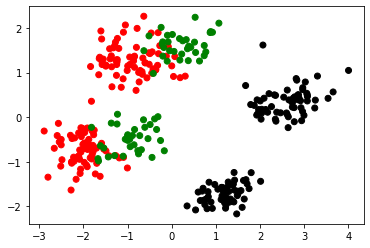

In [9]:
import matplotlib.pyplot as plt
colors=['red' if x=='Adelie' else 'green' if x=='Chinstrap' else 'black' for x in lab]
plt.scatter(P[:,0], P[:,1], c=colors)
plt.show()

## Métodos no-lineales

PCA es lineal, en el sentido en que la transformación de $\mathbf{X}$ a $\mathbf{P}$ es una función lineal. Existe una gran cantidad de métodos no lineales para reducción de dimensionalidad, con distintos propósitos.

Uno de los más útiles es t-SNE (t-Stochastic Nearest Neighbors Embedding), que es muy útil para visualización.

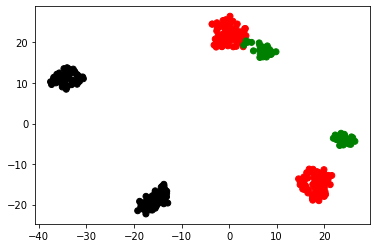

In [10]:
from sklearn.manifold import TSNE
T = TSNE(n_components=2).fit_transform(X_s)
plt.scatter(T[:,0], T[:,1], c=colors)
plt.show()